<a href="https://colab.research.google.com/github/Analyst-Rhoda/Marketing-Campaign/blob/main/Marketing_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mc=pd.read_csv('/content/marketing_campaign_dataset.xlsx - marketing_campaign_dataset.csv')

In [ ]:
mc.shape

(200005, 15)

In [ ]:
mc.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,1/1/2021,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,1/2/2021,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,1/3/2021,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,1/4/2021,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,1/5/2021,379,4201,3,Health & Wellness


In [ ]:
mc.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


In [ ]:
mc.dtypes

,0
Campaign_ID,int64
Company,object
Campaign_Type,object
Target_Audience,object
Duration,object
Channel_Used,object
Conversion_Rate,float64
Acquisition_Cost,object
ROI,float64
Location,object


In [ ]:
mc.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Date', 'Clicks', 'Impressions', 'Engagement_Score',
       'Customer_Segment'],
      dtype='object')

In [ ]:
mc['Acquisition_Cost'] = mc['Acquisition_Cost'] .str.replace('[\$,]', '', regex=True)
mc['Acquisition_Cost'] = mc['Acquisition_Cost'] .str.replace(',', '')
mc['Acquisition_Cost'] = mc['Acquisition_Cost'] .astype(float)
mc[['Acquisition_Cost']] .head()

,Acquisition_Cost
0,16174.0
1,11566.0
2,10200.0
3,12724.0
4,16452.0


In [ ]:
mc.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,200005.000000,200005.000000,200005.000000,200005.000000,200005.000000,200005.000000,200005.000000
mean,100003.000000,0.080069,12504.441794,5.002416,549.774591,5507.307107,5.494673
std,57736.614632,0.040602,4337.663210,1.734485,260.019354,2596.863794,2.872593
min,1.000000,0.010000,5000.000000,2.000000,100.000000,1000.000000,1.000000
25%,50002.000000,0.050000,8740.000000,3.500000,325.000000,3266.000000,3.000000
50%,100003.000000,0.080000,12497.000000,5.010000,550.000000,5518.000000,5.000000
75%,150004.000000,0.120000,16264.000000,6.510000,775.000000,7753.000000,8.000000
max,200005.000000,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000


In [ ]:
mc['Target_Audience']. unique()

array(['Men 18-24', 'Women 35-44', 'Men 25-34', 'All Ages', 'Women 25-34'],
      dtype=object)

In [ ]:
mc['Campaign_Type'] . unique()

array(['Email', 'Influencer', 'Display', 'Search', 'Social Media'],
      dtype=object)

In [ ]:
mc['Company'].unique()

array(['Innovate Industries', 'NexGen Systems', 'Alpha Innovations',
       'DataTech Solutions', 'TechCorp'], dtype=object)

In [ ]:
mc['Channel_Used']. unique()

array(['Google Ads', 'YouTube', 'Instagram', 'Website', 'Facebook',
       'Email'], dtype=object)

In [ ]:
mc['Location'] .unique()

array(['Chicago', 'New York', 'Los Angeles', 'Miami', 'Houston'],
      dtype=object)

In [ ]:
mc['CTR']= (mc['Clicks']/ mc['Impressions']) * 100
print(mc[['CTR']].head())

         CTR
0  26.326743
1   1.541938
2   7.586386
3  11.923077
4   9.021662


In [ ]:
mc['CPC'] = (mc['Acquisition_Cost'] / mc['Clicks'])
print(mc[['CPC']].head())

         CPC
0  31.964427
1  99.706897
2  17.465753
3  58.635945
4  43.408971


In [ ]:
mc[['Campaign_ID', 'ROI']] .sort_values(by='ROI', ascending=False).head(10)

,Campaign_ID,ROI
182656,182657,8.0
83445,83446,8.0
73036,73037,8.0
140372,140373,8.0
104050,104051,8.0
3231,3232,8.0
132599,132600,8.0
119321,119322,8.0
50501,50502,8.0
98646,98647,8.0


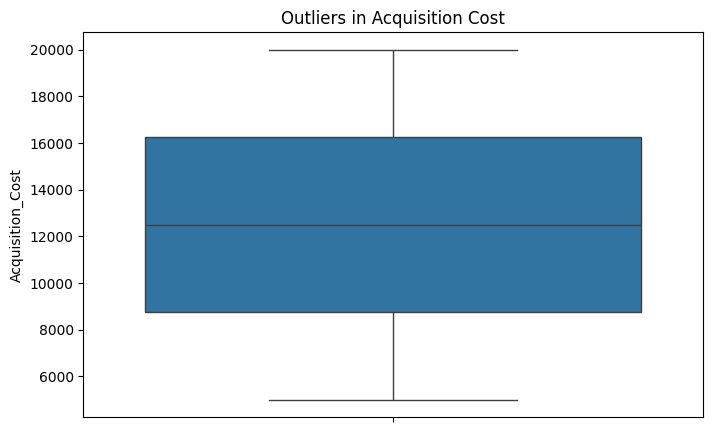

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(mc['Acquisition_Cost'])
plt.title('Outliers in Acquisition Cost')
plt.show()

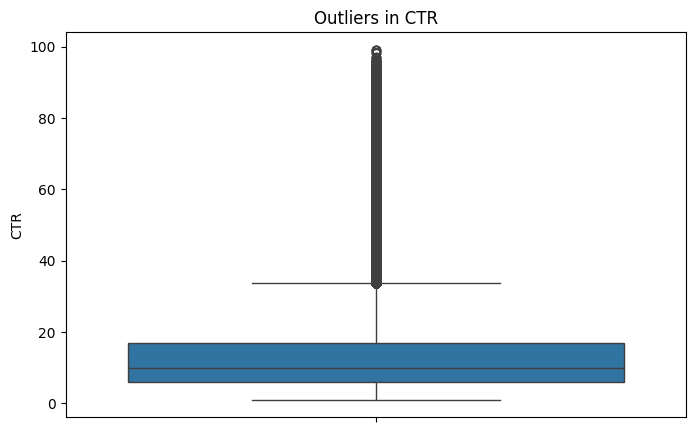

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(mc['CTR'])
plt.title('Outliers in CTR')
plt.show()

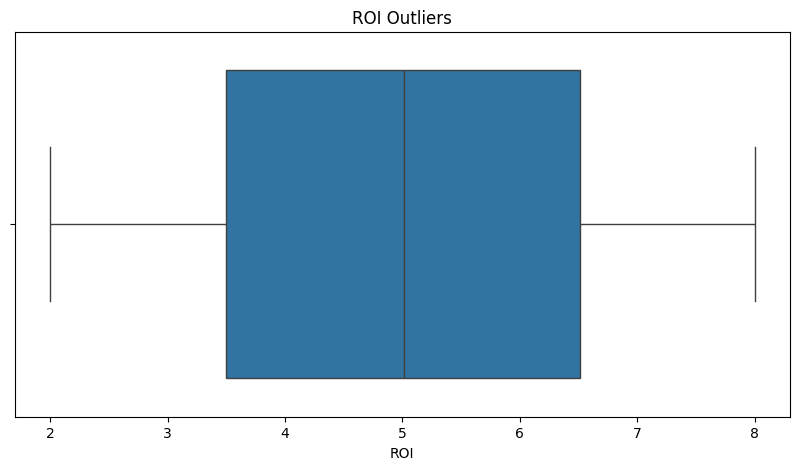

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=mc['ROI'])
plt.title('ROI Outliers')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module
import seaborn as sns

In [ ]:
mc = pd.read_csv('/content/marketing_campaign_dataset.xlsx - marketing_campaign_dataset.csv')

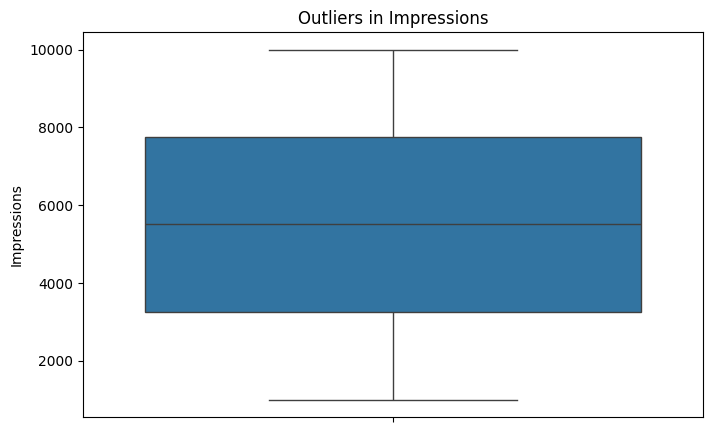

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(mc['Impressions'])
plt.title('Outliers in Impressions')
plt.show()

In [ ]:
channel_performance = mc.groupby('Channel_Used')[['ROI', 'Clicks', 'Conversion_Rate']]. mean().reset_index()
print(channel_performance)

  Channel_Used       ROI      Clicks  Conversion_Rate
0        Email  4.996487  550.431947         0.080282
1     Facebook  5.018672  549.609232         0.079990
2   Google Ads  5.003126  548.522398         0.080181
3    Instagram  4.988706  548.534200         0.079886
4      Website  5.014114  552.002368         0.080182
5      YouTube  4.993720  549.544366         0.079890


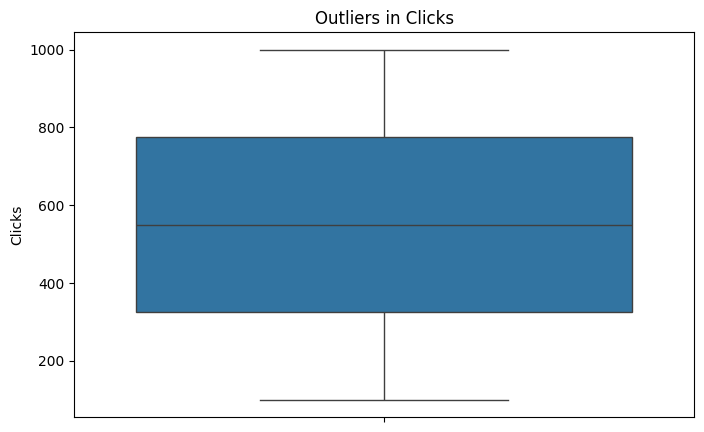

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(mc['Clicks'])
plt.title('Outliers in Clicks')
plt.show()

<ipython-input-66-ca150720e64f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel_Used', y='Conversion_Rate', data=channel_performance, palette='magma') # Pass channel_performance to the 'data' argument


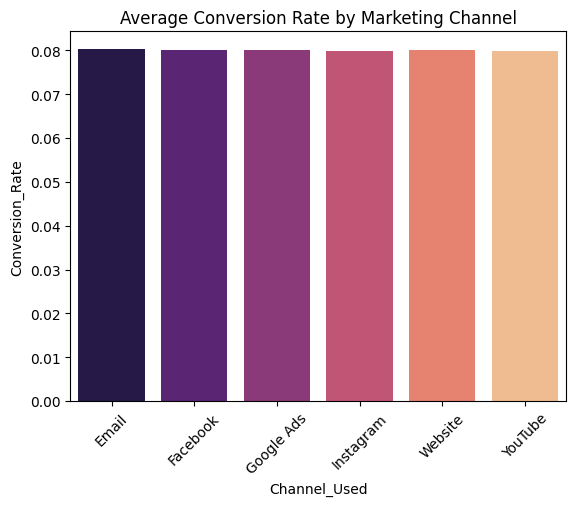

In [ ]:
sns.barplot(x='Channel_Used', y='Conversion_Rate', data=channel_performance, palette='magma') # Pass channel_performance to the 'data' argument
plt.xticks(rotation=45)
plt.title('Average Conversion Rate by Marketing Channel')
plt.show()

<ipython-input-65-6337c9e3c278>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel_Used', y='CTR', data=channel_ctr, palette='coolwarm') # Now channel_ctr is defined


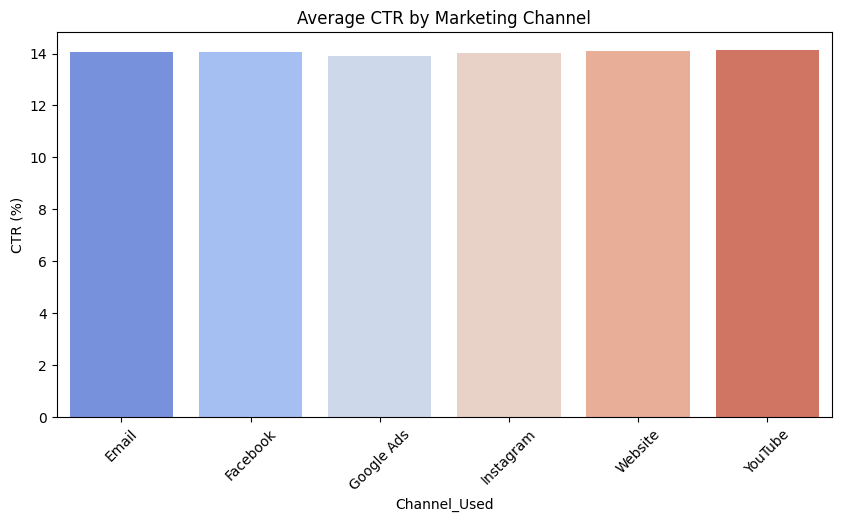

In [ ]:
channel_ctr = mc.groupby('Channel_Used')['CTR'].mean().reset_index() # Create channel_ctr DataFrame
plt.figure(figsize=(10, 5))
sns.barplot(x='Channel_Used', y='CTR', data=channel_ctr, palette='coolwarm') # Now channel_ctr is defined
plt.xticks(rotation=45)
plt.title('Average CTR by Marketing Channel')
plt.ylabel('CTR (%)')
plt.show()

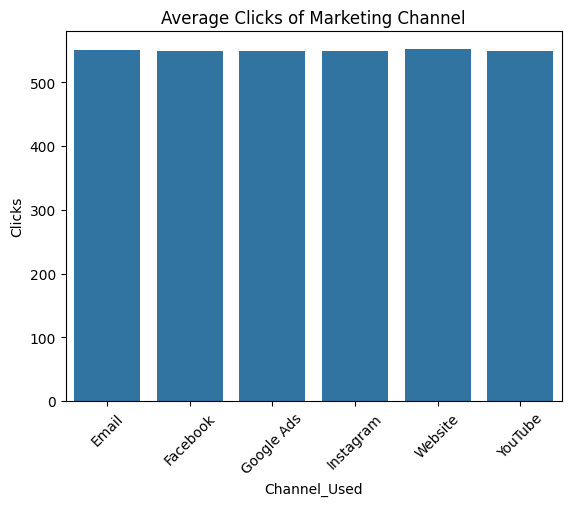

In [ ]:
sns.barplot(x='Channel_Used', y='Clicks', data=channel_performance) # Pass channel_performance to the 'data' argument
plt.xticks(rotation=45)
plt.title('Average Clicks of Marketing Channel')
plt.show()

In [ ]:
channel_impressions = mc.groupby('Channel_Used')['Impressions'] .sum().reset_index()
channel_impressions = channel_impressions.sort_values(by='Impressions', ascending=False)
print(channel_impressions)

  Channel_Used  Impressions
2   Google Ads    185020154
0        Email    184801107
4      Website    183815901
3    Instagram    183738455
5      YouTube    183450845
1     Facebook    180662496


<ipython-input-63-7061b0974007>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel_Used', y='Impressions', data=channel_impressions, palette='viridis')


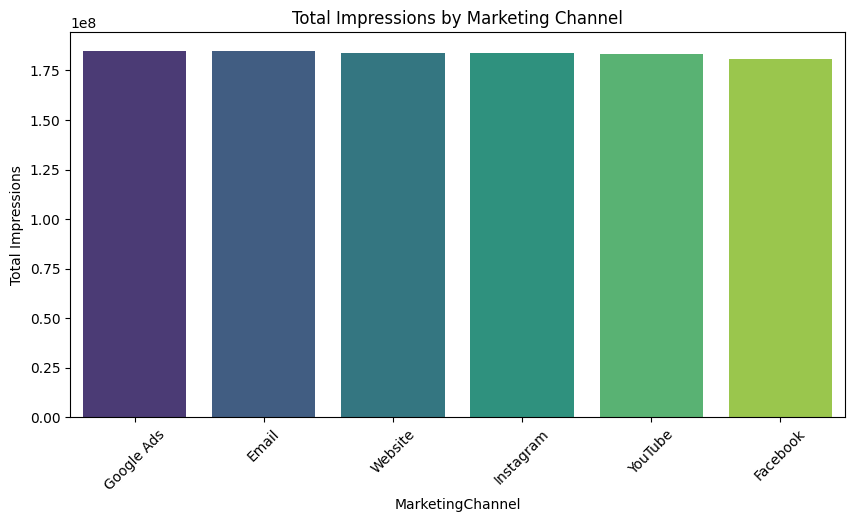

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Channel_Used', y='Impressions', data=channel_impressions, palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Impressions by Marketing Channel')
plt.xlabel('MarketingChannel')
plt.ylabel('Total Impressions')
plt.show()

In [ ]:
top_campaigns = mc.nlargest(5, 'ROI')[['Campaign_ID', 'Company', 'Campaign_Type', 'ROI']]
worst_campaigns = mc.nsmallest(5, 'ROI')[['Campaign_ID', 'Company', 'Campaign_Type', 'ROI']]
print('Top 5 campaigns:\n', top_campaigns)
print('Worst 5 Campaigns:\n', worst_campaigns)



Top 5 campaigns:
       Campaign_ID              Company Campaign_Type  ROI
167           168       NexGen Systems       Display  8.0
219           220  Innovate Industries    Influencer  8.0
3055         3056       NexGen Systems        Search  8.0
3231         3232    Alpha Innovations       Display  8.0
5347         5348             TechCorp  Social Media  8.0
Worst 5 Campaigns:
        Campaign_ID            Company Campaign_Type  ROI
1163          1164     NexGen Systems       Display  2.0
1380          1381  Alpha Innovations       Display  2.0
7599          7600           TechCorp       Display  2.0
7823          7824           TechCorp  Social Media  2.0
10285        10286  Alpha Innovations         Email  2.0


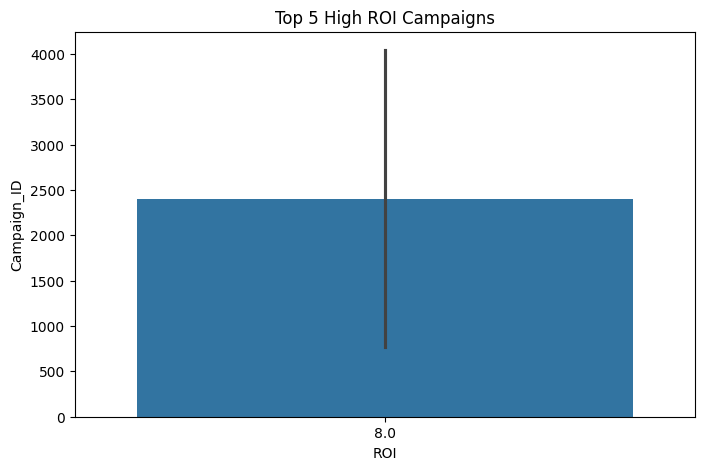

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='ROI', y='Campaign_ID', data=top_campaigns)
plt.title('Top 5 High ROI Campaigns')
plt.show()

In [ ]:
segment_performance = mc.groupby('Customer_Segment')[['Engagement_Score', 'Conversion_Rate']]. mean() .reset_index()
print(segment_performance)

      Customer_Segment  Engagement_Score  Conversion_Rate
0         Fashionistas          5.489910         0.079794
1              Foodies          5.511390         0.080256
2    Health & Wellness          5.484156         0.079945
3  Outdoor Adventurers          5.502737         0.080180
4     Tech Enthusiasts          5.485058         0.080165


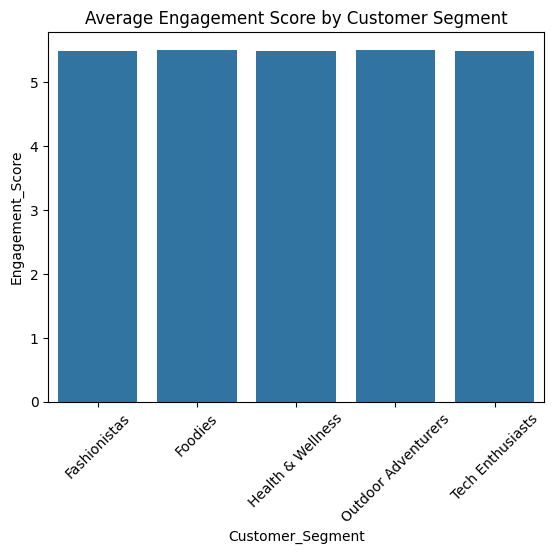

In [ ]:
sns.barplot(x='Customer_Segment', y='Engagement_Score', data=segment_performance)
plt.xticks(rotation=45)
plt.title('Average Engagement Score by Customer Segment')
plt.show()

In [ ]:
channel_conversion = mc.groupby('Channel_Used')['Conversion_Rate']. mean().sort_values(ascending=False)
print(channel_conversion)

Channel_Used
Email         0.080282
Website       0.080182
Google Ads    0.080181
Facebook      0.079990
YouTube       0.079890
Instagram     0.079886
Name: Conversion_Rate, dtype: float64


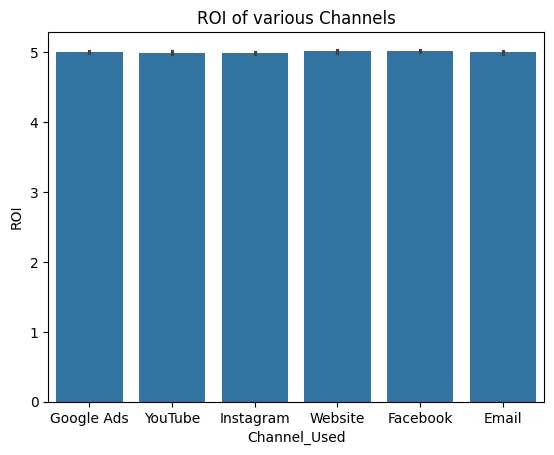

In [ ]:
sns.barplot(x='Channel_Used', y='ROI', data=mc)
plt.title('ROI of various Channels')
plt.show()

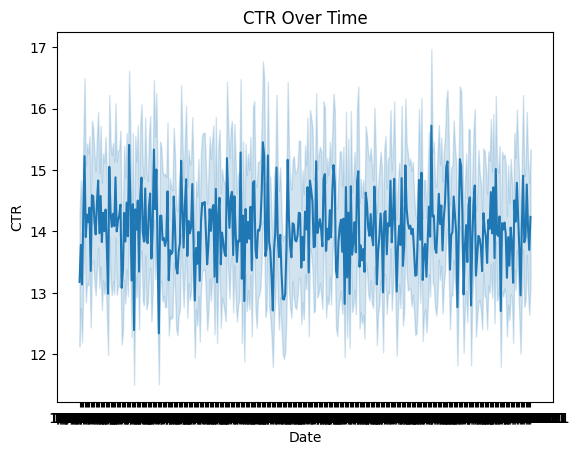

In [ ]:
sns.lineplot(x='Date', y='CTR', data=mc)
plt.title('CTR Over Time')
plt.show()

In [ ]:
Location_performance = mc.groupby('Location')[['Conversion_Rate', 'ROI']].mean().reset_index()
print(Location_performance)

      Location  Conversion_Rate       ROI
0      Chicago         0.080131  5.001555
1      Houston         0.079949  5.007174
2  Los Angeles         0.080013  5.010876
3        Miami         0.080047  5.012282
4     New York         0.080203  4.980185


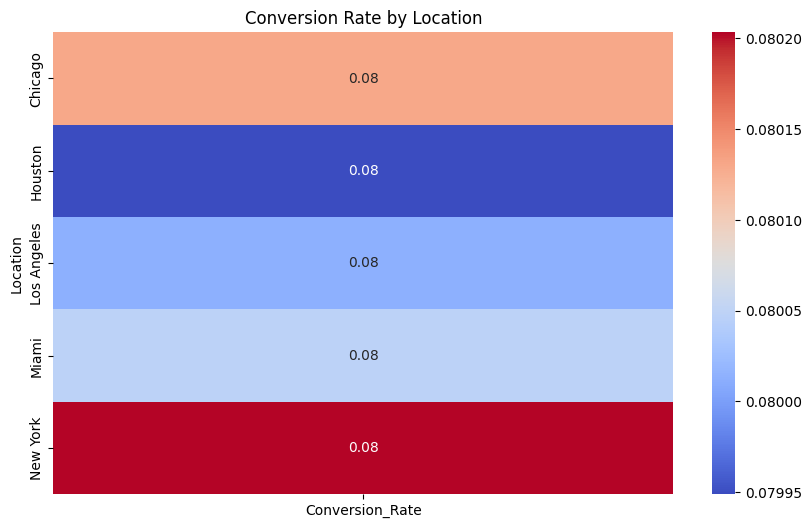

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(mc.pivot_table(values='Conversion_Rate', index='Location'), cmap='coolwarm', annot=True)
plt.title('Conversion Rate by Location')
plt.show()

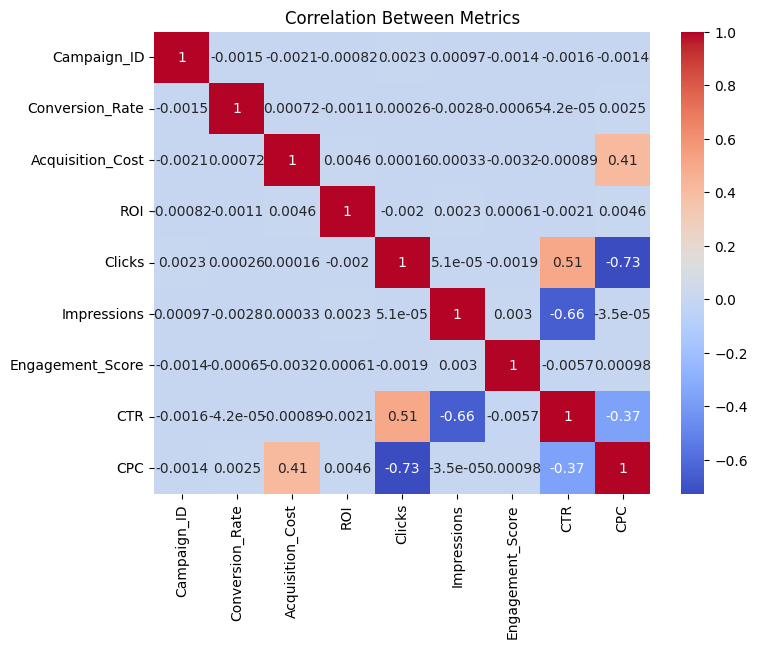

In [ ]:
plt.figure(figsize=(8, 6))
# Select only numerical columns for correlation analysis
numerical_mc = mc.select_dtypes(include=np.number)
sns.heatmap(numerical_mc.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Metrics')
plt.show()

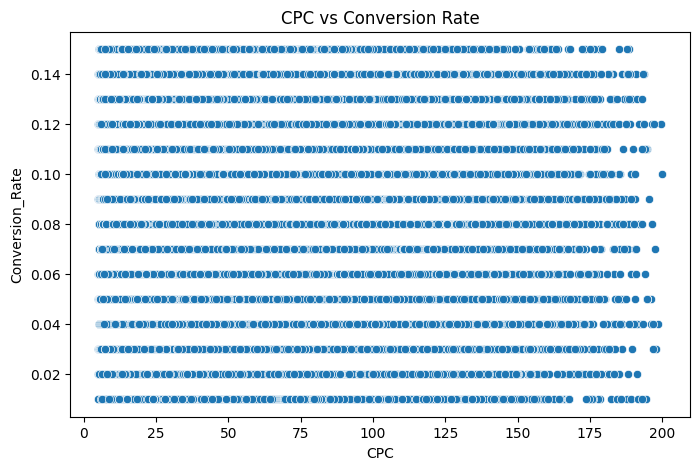

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=mc['CPC'], y=mc['Conversion_Rate'])
plt.title('CPC vs Conversion Rate')
plt.show()